In [11]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import scipy as sp
import seaborn as sns
from PIL import Image
from plotly.subplots import make_subplots 
import plotly.express as px
ds = pd.read_csv("/Users/shivamraj/Desktop/VIT 3rd Sem/DATA VISUALIZATION/Project/ElectricCarData_Clean.csv.xls")
plt = px.scatter(ds, x = "TopSpeed_KmH", y = "PowerTrain", color="PowerTrain") 
plt.update_layout(
title="Power Train vs Top speed", xaxis_title="Top Speed in Km-H", yaxis_title="Power Train", font=dict(family="Courier New, monospace",
size=18,color="#7f7f7f"))

In [12]:
fig = px.bar(ds,x="PlugType", y= "BodyStyle", color="Segment", title="Different Plugstyles of cars of Different bodystyle")
fig.show()

In [3]:

pie = px.pie(ds,values = "Seats", names = "Seats", title = "Cars offering Seating Capacity")
pie

In [4]:
plt = px.scatter(ds, x = "TopSpeed_KmH", y = "PowerTrain", color="PowerTrain") 
plt.update_layout(
title="Power Train vs Top speed", xaxis_title="Top Speed in Km-H", yaxis_title="Power Train", font=dict(family="Courier New, monospace",
size=18,color="#7f7f7f"))

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os
import pandas as pd 

In [6]:

nRowsRead = 1000
df1 = pd.read_csv('/Users/shivamraj/Desktop/VIT 3rd Sem/DATA VISUALIZATION/Project/Electric_Vehicle_Population_Data (1).csv', delimiter=',', nrows = nRowsRead)

In [7]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [8]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

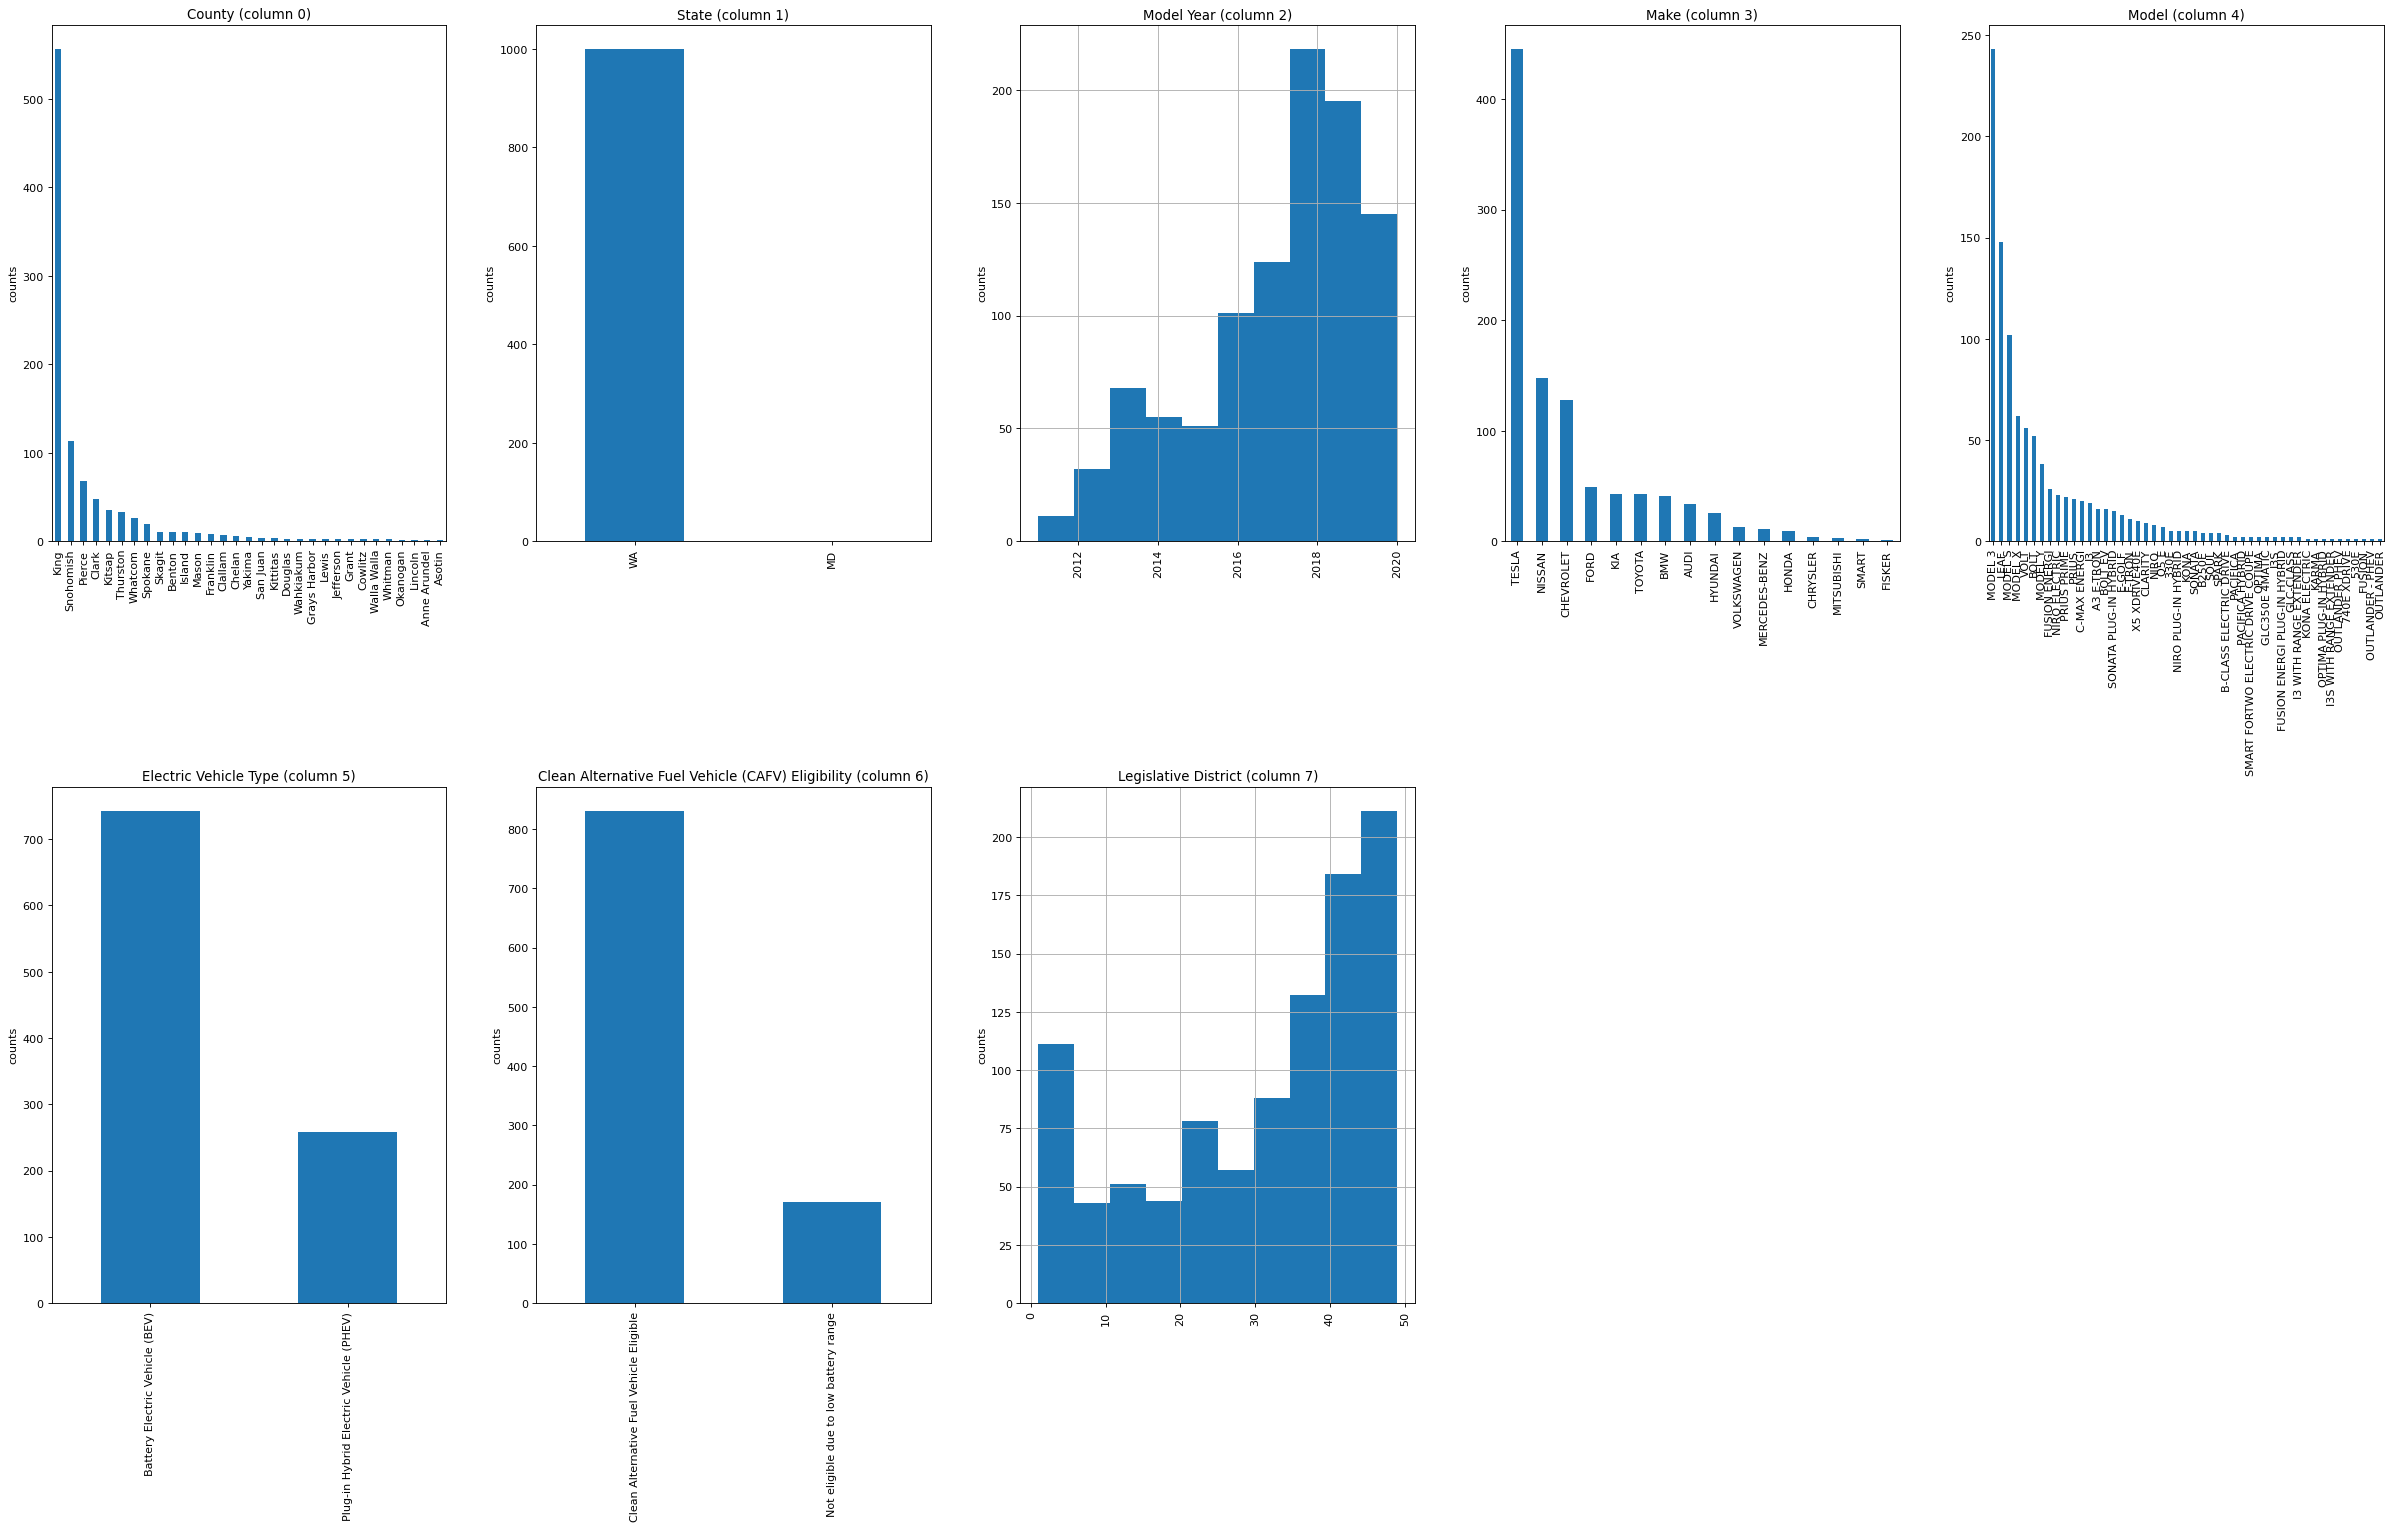

In [9]:
plotPerColumnDistribution(df1, 10, 5)

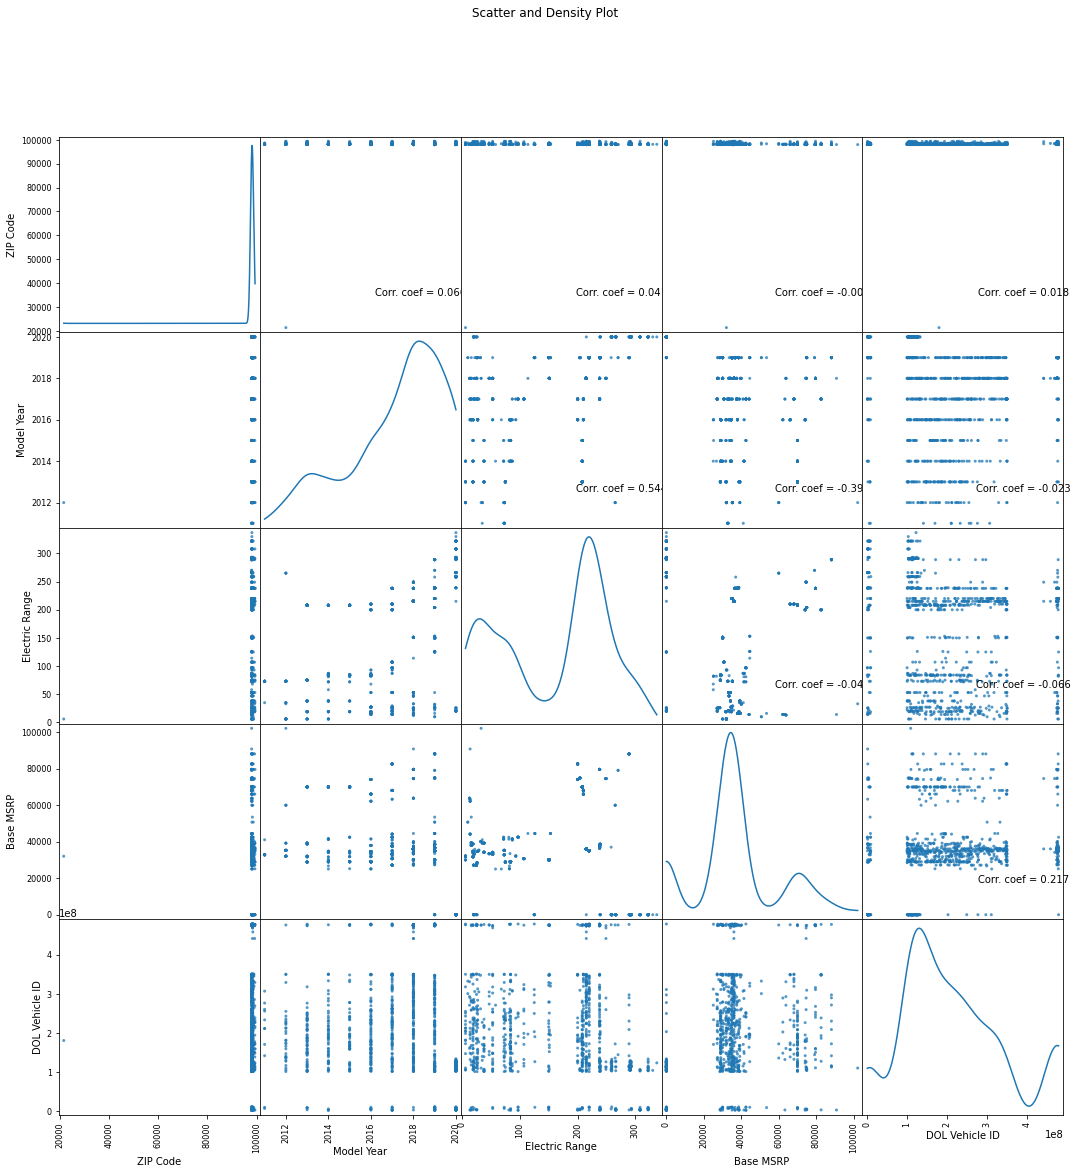

In [10]:
plotScatterMatrix(df1, 18, 10)